1. 使用jupyter notebook的形式完成代码以及分析报告
2. 统计“通知人”都有哪些，各占比例多少？
3. 分析附件下载次数与通知人是否关系，若有，有什么联系？
4. 统计每天的通知数，分析哪段时间通知比较密集？
5. 自行思考一个感兴趣的问题，并进行数据分析
6. 尝试使用数据可视化工具对3、4问题进行可视化呈现

## 1. 导入并加载数据

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

data_set = pd.read_csv("notification.csv")
# 转化数据类型
data_set["时间"] = pd.to_datetime(data_set["时间"])

data_set.head()

,时间,发布机构,标题,链接,下载次数
0,2024-12-30,【实践科】,关于对2024年学院教学有关数据进行统计的通知,https://jwch.fzu.edu.cn/info/1039/13836.htm,116
1,2024-12-31,【教材中心】,关于开展2025年拟出版本科教材审核工作的通知,https://jwch.fzu.edu.cn/content.jsp?urltype=ne...,0
2,2024-12-30,【实践科】,关于举办福州大学第十一届桥梁设计大赛的通知,https://jwch.fzu.edu.cn/info/1039/13834.htm,27
3,2024-12-29,【教学运行】,关于2024-2025学年第一学期《大学物理A（下）》和《大学物理B（下）》课程期末考试安排的通知,https://jwch.fzu.edu.cn/info/1036/13833.htm,35
4,2024-12-29,【教学运行】,关于2024-2025学年第一学期《高等数学A（上）》、《高等数学B（上）》、《高等数学C（...,https://jwch.fzu.edu.cn/info/1036/13831.htm,165


## 2. 统计“通知人”都有哪些，各占比例多少？

<Axes: ylabel='count'>

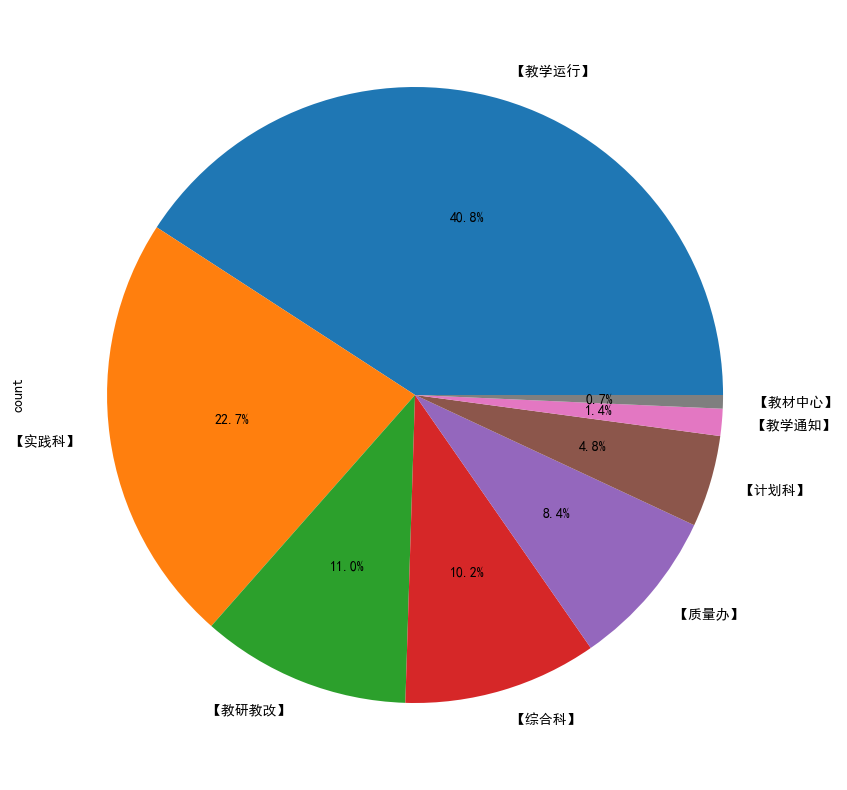

In [12]:
data_set['发布机构'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10))

## 3. 分析附件下载次数与通知人是否关系，若有，有什么联系？

<Axes: title={'center': '发布机构总下载次数'}, xlabel='发布机构'>

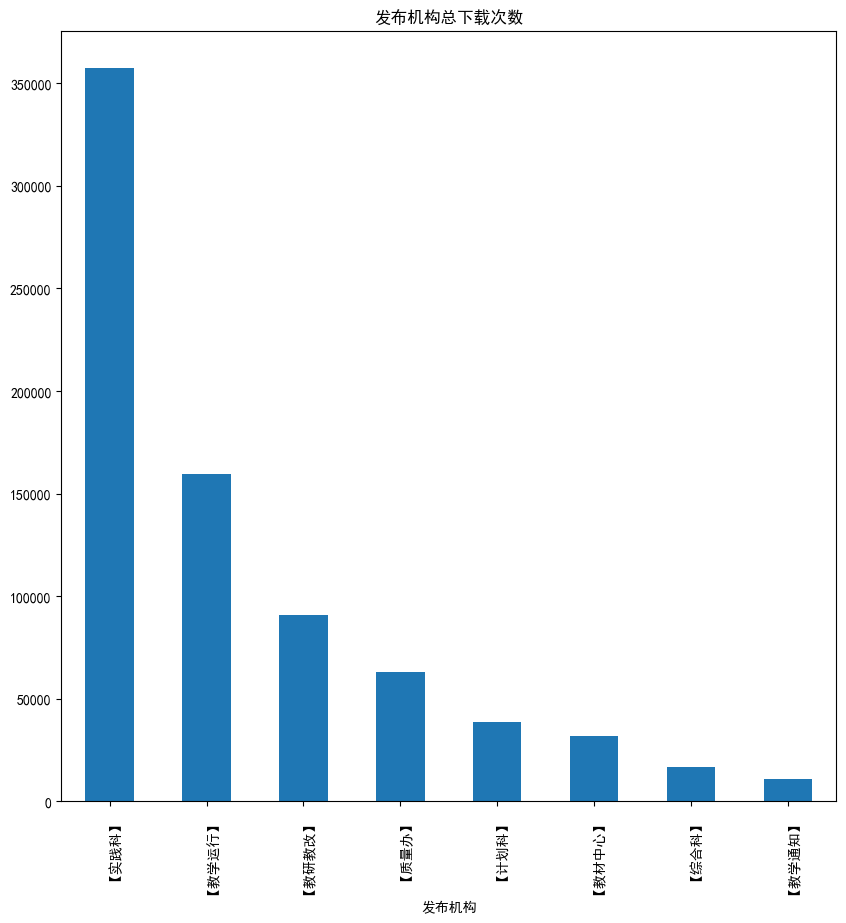

In [13]:
data_set.groupby('发布机构')["下载次数"].sum().sort_values(ascending=False).plot(
    kind='bar',
    title='发布机构总下载次数',
    figsize=(10, 10),
)

## 4. 统计每天的通知数，分析哪段时间通知比较密集？

解析时间

In [14]:
data_set["年"] = data_set["时间"].dt.year
data_set["月"] = data_set["时间"].dt.month
data_set["日"] = data_set["时间"].dt.day

### 1. 每年分析

<Axes: title={'center': '年通知发布数量'}, xlabel='年'>

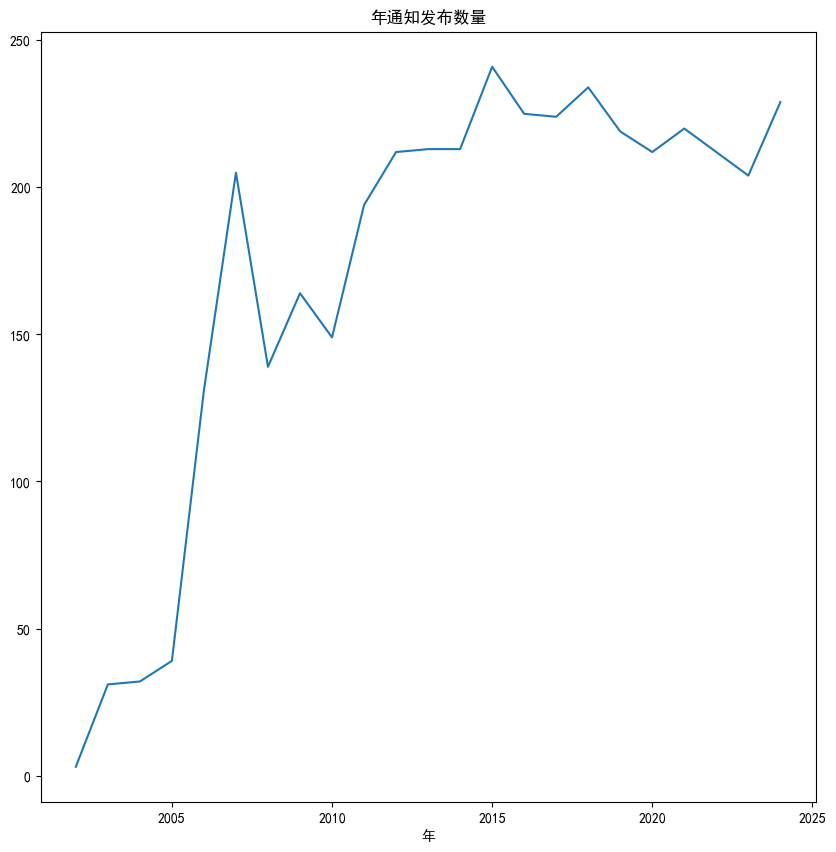

In [15]:
data_set["年"].value_counts().sort_index().plot(
    kind="line",
    title="年通知发布数量",
    figsize=(10, 10),
)

### 2. 月分析

<Axes: title={'center': '月通知发布数量'}, xlabel='月'>

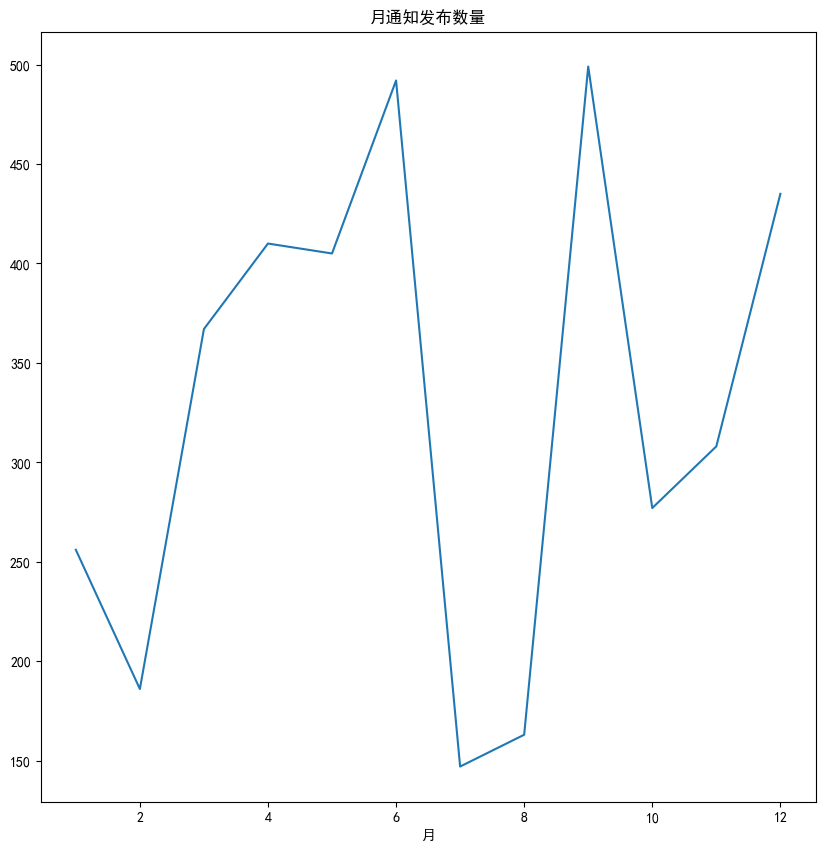

In [16]:
data_set["月"].value_counts().sort_index().plot(
    kind="line",
    title="月通知发布数量",
    figsize=(10, 10),
)

### 3. 日分析

<Axes: title={'center': '日通知发布数量'}, xlabel='日'>

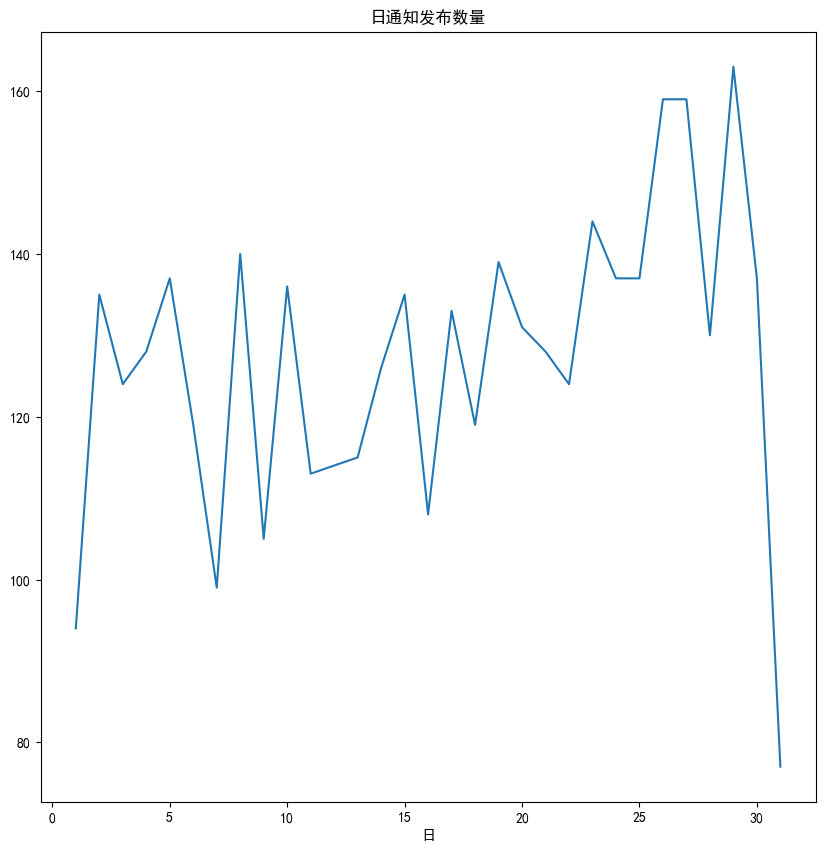

In [17]:
data_set["日"].value_counts().sort_index().plot(
    kind="line",
    title="日通知发布数量",
    figsize=(10, 10),
)

## 5. others

### 1. 发布人与标题平均长度

发布机构
【计划科】     30.752632
【实践科】     29.210291
【教材中心】    27.535714
【教研教改】    27.523041
【教学通知】    27.250000
【教学运行】    26.820608
【质量办】     25.277946
【综合科】     23.144638
Name: 标题长度, dtype: float64


<Axes: title={'center': '标题平均长度'}, xlabel='发布机构'>

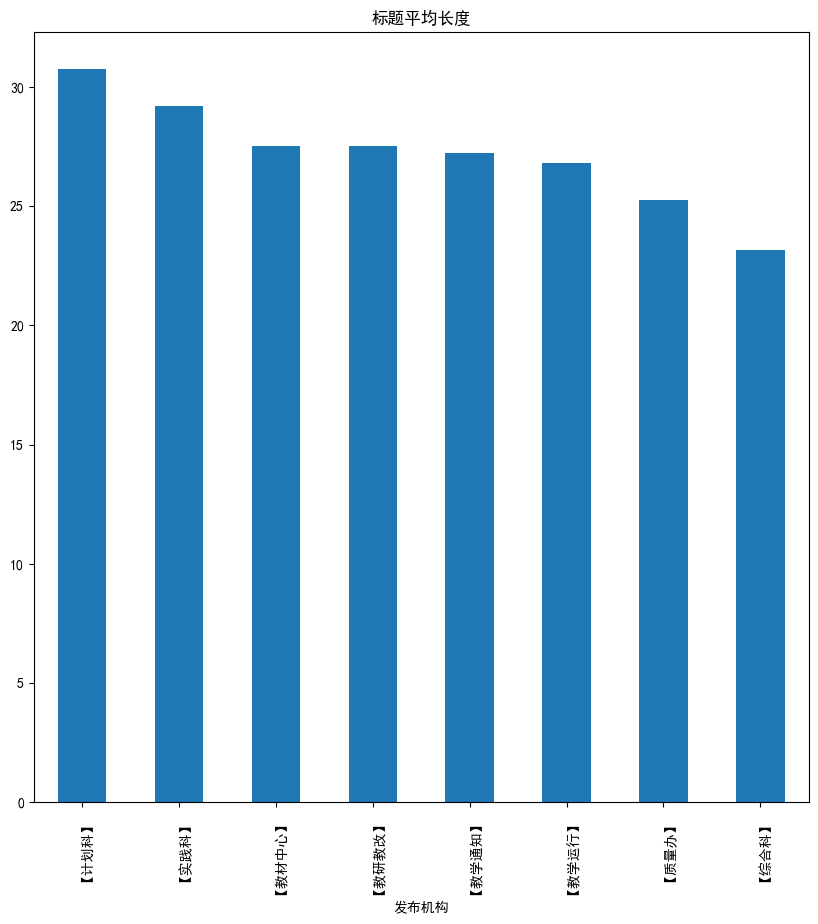

In [18]:
data_set["标题长度"] = data_set["标题"].apply(lambda x: len(x))

average_title_length = data_set.groupby("发布机构")["标题长度"].mean().sort_values(ascending=False)
print(average_title_length)

average_title_length.plot(
    kind="bar",
    title="标题平均长度",
    figsize=(10, 10),
)

### 2. Logistic 函数

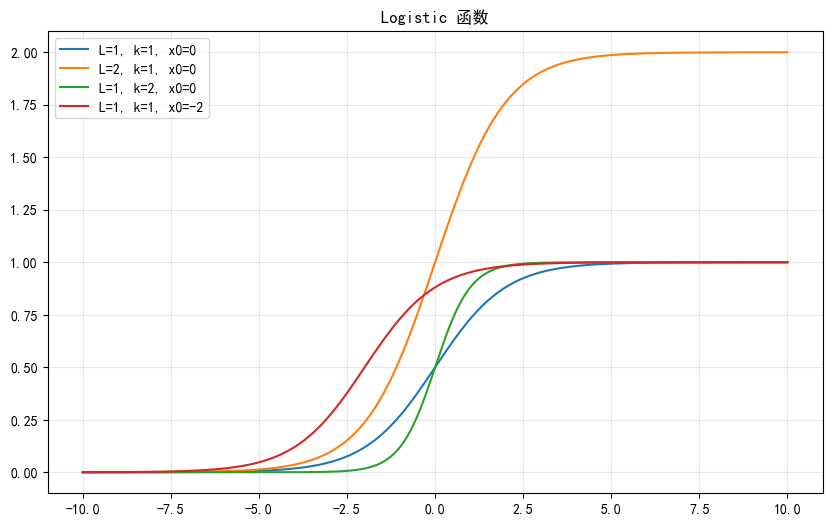

In [19]:
import numpy as np
import matplotlib.pyplot as plt


# 定义 Logistic 函数
def logistic(x, L=1, k=1, x0=0):
    return L / (1 + np.exp(-k * (x - x0)))
x = np.linspace(-10, 10, 500)

params = [
    {"x":x, "L": 1, "k": 1, "x0": 0,},
    {"x":x, "L": 2, "k": 1, "x0": 0,},
    {"x":x, "L": 1, "k": 2, "x0": 0,},
    {"x":x, "L": 1, "k": 1, "x0": -2,},
]

# 绘制 Logistic 函数
plt.figure(figsize=(10, 6))
for param in params:
    y = logistic(**param)
    plt.plot(x, y, label=f'L={param["L"]}, k={param["k"]}, x0={param["x0"]}')

# 添加图例和标签
plt.title("Logistic 函数")
plt.legend()
plt.grid(alpha=0.3)